In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

In [2]:
data_dir = "/home/ilia/datasets/raw_img/"

In [3]:
files = os.listdir(data_dir)

In [4]:
files.sort()
files = [file for file in files if file.split(".")[-1] == "png"]

In [5]:
images = []
for file in tqdm(files):
    image = cv.cvtColor(cv.imread(data_dir+file), cv.COLOR_BGR2RGB)
    image = image[image.shape[0]//2:,:,:]
    images.append(image)

100%|████████████████████████████████████████| 520/520 [00:04<00:00, 110.02it/s]


In [8]:
huge_image = images[0].copy()
for i, image in tqdm(enumerate(images)):
    if i == 0:
        continue
    huge_image = np.vstack((huge_image, image))

520it [00:13, 39.99it/s] 


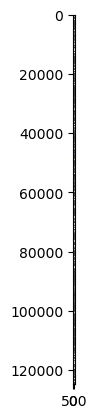

In [9]:
plt.imshow(huge_image)

In [10]:
algo = GaussianMixture(n_components=3)

mask = algo.fit_predict(huge_image.reshape((-1,3)))
# plt.imshow(mask.reshape(images[0].shape[:-1]))

In [11]:
result_dir = "/home/ilia/datasets/masks/"
combo_dir = "/home/ilia/datasets/mask+raw/"
new_dir = "/home/ilia/datasets/mask_raw_common/"

In [13]:
mask = mask.reshape((-1, images[0].shape[1]))

In [15]:
for i, image in tqdm(enumerate(images)):
    cur_mask = mask[i * image.shape[0]:(i+1) * image.shape[0], :]
    # cur_mask = np.dstack((cur_mask * 100, cur_mask * 100, cur_mask * 100))
    figure, axis = plt.subplots(1,2)
    axis[0].imshow(cur_mask)
    axis[1].imshow(image)
    plt.savefig(new_dir+files[i])
    plt.close()

520it [00:45, 11.42it/s]


In [35]:
for i, image in tqdm(enumerate(images)):
    algo = GaussianMixture(n_components=3)
    mask = algo.fit_predict(image.reshape((-1,3))).reshape(image.shape[:-1])
    result = np.dstack((mask * 100, mask * 100, mask * 100))
    cv.imwrite(result_dir + files[i],result)
    figure, axis = plt.subplots(1,2)
    axis[0].imshow(mask)
    axis[1].imshow(image)
    plt.savefig(combo_dir+files[i])
    plt.close()

520it [13:22,  1.54s/it]
